<a href="https://colab.research.google.com/github/ElizaOG11/EDA-Analisis-exploratorio-Taller-1/blob/main/Analisis_calidad_agua_R_Cauca_Pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCCIÓN**

Se eligió una base de datos de calidad de agua de ocho corrientes del Municipio de Popayán, manejada por la Corporación Autónoma Regional del Cauca (CRC), la cual tiene datos de diferentes parámetros de calidad del agua medidos en distintas estaciones de monitoreo en tres épocas del año para periodos entre 2010 y 2024, en varias de ellas. Como podrá observarse, la base de datos no está organizada y tiene muchos valores perdidos. La información contenida es importante para analizar el estado de cada corriente hídrica en cuanto a calidad y oferta, en este sentido, priorizar las intervenciones en cada una de las fuentes, dependiendo de los resultados arrojados, permite el mantenimiento de la oferta y la recuperación de su calidad tanto para el consumo humano (dependiendo de la fuente) como para el equilibrio ecológico de los ecosistemas permitiendo que la población en general, continúe con la provisión de los servicios ecosistémicos.

Teniendo en cuenta que el Río Cauca es una de las fuentes principales a nivel local, regional y nacional, y que en este convergen las principales corrientes hídricas monitoreadas, fue elegida como base de análisis para el proyecto.


# **Selección de una variable**

***Se seleccionó la variable DQO (Demanda Química de Oxígeno).***

La DQO mide la cantidad de oxígeno necesaria para oxidar químicamente la materia orgánica (y algunos compuestos inorgánicos) presentes en el agua, utilizando un agente oxidante fuerte. A diferencia de la DBO 5, que solo tiene en cuenta la materia biodegradable, la DQO evalúa **toda** la materia orgánica, proporcionando una visión más completa de la carga contaminante.

*Fuente: Eurofins Environment Testing Spain https://www.eurofins-environment.es/es/dbo5-dqo-analisis-aguas/*

Así las cosas, su relevancia dentro del conjunto de datos radica en que refleja de manera integral el grado de contaminación del agua, siendo más sensible que otros parámetros para detectar cargas contaminantes procedentes de descargas domésticas, industriales y agrícolas. Al concentrarse en la DQO del río Cauca, es posible identificar los tramos y periodos con mayor presión ambiental, lo que permite establecer prioridades de intervención.

En el análisis, la DQO se convierte en una variable crítica porque actúa como un indicador temprano de deterioro, facilitando la detección de tendencias a largo plazo y la predicción de escenarios futuros de riesgo. En la toma de decisiones, contar con esta información permite a las autoridades ambientales y a los gestores del recurso diseñar estrategias más focalizadas de control de vertimientos, monitoreo y restauración, priorizando las zonas con mayor vulnerabilidad y asegurando un uso más sostenible del agua en el territorio.

In [ ]:
#Importar librerías

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# **Visión general de los datos**

In [ ]:

#Cargar la base de datos y explorarla.
df = pd.read_csv('/content/Corrientes_CALIDAD_2010-2024.csv', sep = ';', encoding='ISO-8859-1', engine='python')
df.head()

,Ano,Epoca,FECHA_MONITOREO,CORRIENTE,PUNTO_MONITOREO,PUNTO_MONITOREO_COMPUESTO,PUNTO DE MONITOREO_Original,MUNICIPIO,MUNICIPIO_AJUSTADO,VEREDA,Variable,Unidades,Deteccion,Valor,CALIFICACIàN DE LA CALIDAD DEL AGUA
0,2010,Seca,7/09/2010,R¡o Cauca,Estaci¢n Julumito,R¡o Cauca - Estaci¢n Julumito,R.Cauca Puente Estaci¢n Julumito,Popay n,Popay n,Cajete,COLOR UPC,UPC,NaN,38,NaN
1,2010,Seca,7/09/2010,R¡o Cauca,Estaci¢n Julumito,R¡o Cauca - Estaci¢n Julumito,R.Cauca Puente Estaci¢n Julumito,Popay n,Popay n,Cajete,DBO,mg/L,NaN,1.2,NaN
2,2010,Seca,7/09/2010,R¡o Cauca,Estaci¢n Julumito,R¡o Cauca - Estaci¢n Julumito,R.Cauca Puente Estaci¢n Julumito,Popay n,Popay n,Cajete,DQO,mg/L,NaN,4,NaN
3,2010,Seca,7/09/2010,R¡o Cauca,Estaci¢n Julumito,R¡o Cauca - Estaci¢n Julumito,R.Cauca Puente Estaci¢n Julumito,Popay n,Popay n,Cajete,DUREZA,mg CaCO3/L,NaN,53.5,NaN
4,2010,Seca,7/09/2010,R¡o Cauca,Estaci¢n Julumito,R¡o Cauca - Estaci¢n Julumito,R.Cauca Puente Estaci¢n Julumito,Popay n,Popay n,Cajete,NITRATOS,mg NO3-N/L,NaN,2.53,NaN


In [ ]:
#Ver tamaño del dataframe.
df.shape

(15232, 15)

In [ ]:
#Revisar las columnas del dataframe para seleccionar cuáles deben eliminarse.
df.columns

Index(['Ano', 'Epoca', 'FECHA_MONITOREO', 'CORRIENTE', 'PUNTO_MONITOREO',
       'PUNTO_MONITOREO_COMPUESTO', 'PUNTO DE MONITOREO_Original', 'MUNICIPIO',
       'MUNICIPIO_AJUSTADO', 'VEREDA', 'Variable', 'Unidades', 'Deteccion',
       'Valor', 'CALIFICACIàN DE LA CALIDAD DEL AGUA '],
      dtype='object')

# **Ajustar formato de los datos**

In [ ]:
# Eliminar columnas innecesarias para el análisis y ver el resultado.
headers = ['FECHA_MONITOREO','PUNTO_MONITOREO','PUNTO_MONITOREO_COMPUESTO','MUNICIPIO','VEREDA', 'Unidades', 'Deteccion']
#print (headers)
newdf = df.drop(headers, axis = 1)
newdf.head(5)


,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,Variable,Valor,CALIFICACIàN DE LA CALIDAD DEL AGUA
0,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,COLOR UPC,38,NaN
1,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,DBO,1.2,NaN
2,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,DQO,4,NaN
3,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,DUREZA,53.5,NaN
4,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,NITRATOS,2.53,NaN


In [ ]:
#Explorar el nuevo dataframe después de la eliminación
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15232 entries, 0 to 15231
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Ano                                   15232 non-null  int64 
 1   Epoca                                 15232 non-null  object
 2   CORRIENTE                             15232 non-null  object
 3   PUNTO DE MONITOREO_Original           15232 non-null  object
 4   MUNICIPIO_AJUSTADO                    15218 non-null  object
 5   Variable                              15232 non-null  object
 6   Valor                                 15232 non-null  object
 7   CALIFICACIàN DE LA CALIDAD DEL AGUA   2763 non-null   object
dtypes: int64(1), object(7)
memory usage: 952.1+ KB


In [ ]:
#Convertir comas a puntos en la columna 'Valor'
newdf['Valor'] = newdf['Valor'].str.replace(',', '.')

In [ ]:
#Convertir object a float
newdf['Valor']=newdf['Valor'].astype('float')
newdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15232 entries, 0 to 15231
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ano                                   15232 non-null  int64  
 1   Epoca                                 15232 non-null  object 
 2   CORRIENTE                             15232 non-null  object 
 3   PUNTO DE MONITOREO_Original           15232 non-null  object 
 4   MUNICIPIO_AJUSTADO                    15218 non-null  object 
 5   Variable                              15232 non-null  object 
 6   Valor                                 15232 non-null  float64
 7   CALIFICACIàN DE LA CALIDAD DEL AGUA   2763 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 952.1+ KB


In [ ]:
#Filtrar los datos de la columna 'Municipio_ajustado' para valores que solo contengan 'Popay' y terminen en 'n'
dfPop = newdf[newdf['MUNICIPIO_AJUSTADO'].str.contains('Popay.*n$', na=False)]
display(dfPop.head(5))

,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,Variable,Valor,CALIFICACIàN DE LA CALIDAD DEL AGUA
0,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,COLOR UPC,38.00,NaN
1,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,DBO,1.20,NaN
2,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,DQO,4.00,NaN
3,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,DUREZA,53.50,NaN
4,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,NITRATOS,2.53,NaN


In [ ]:
#Crear columnas con los parámetros encontrados en la columna 'Variable'. Ejm: DQO, DBO, Alcalinidad, etc., cada una con sus respectivos valores
newdfPop = dfPop.pivot_table(
    index=["Ano", "Epoca", "CORRIENTE", "PUNTO DE MONITOREO_Original", "MUNICIPIO_AJUSTADO"],
    columns="Variable",
    values='Valor',
    aggfunc='mean'
).reset_index()
newdfPop.head(10)


Variable,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,% de OD,ALCALINIDAD,CAUDAL,COLIFORMES FECALES,COLIFORMES FECALES-NMP/100ml,...,Ica-5 Variables,NITRATOS,NITRITOS,NITRàGENO TOTAL,ORTOFOSFATOS,OXIGENO DISUELTO,PH,SST,TEMPERATURA,TURBIEDAD
0,2010,Seca,R¡o Cauca,Estaci¢n Julumito,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Seca,R¡o Cauca,Puente met lico Vivero CRC,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,2.53,0.09,NaN,NaN,8.01,5.98,58.3,17.2,9.0
3,2010,Seca,R¡o Cauca,R¡o Cauca puente met lico Vivero CRC,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,0.80,0.02,NaN,NaN,13.00,5.81,35.0,16.6,1.3
4,2010,Seca,R¡o Ejido,Sauces- Floresta. Centro de salud,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010,Seca,R¡o Ejido,Antes de Barrio Avelino Ull,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010,Seca,R¡o Ejido,Barrio Jun¡n antes de r¡o Molino,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,Seca,R¡o Ejido,"Barrio Los Sauces, frente a puesto de salud Ba...",Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,0.99,0.12,NaN,NaN,5.05,6.87,18.7,18.0,5.7
8,2010,Seca,R¡o Ejido,R¡o Ejido Barrio Jun¡n- (Antes de R. Molino),Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,3.40,0.02,NaN,NaN,3.66,7.39,25.7,18.1,14.5
9,2010,Seca,R¡o Ejido,R¡o Ejido (Antes) . Barrio Avelino Ull,Popay n,NaN,NaN,NaN,NaN,NaN,...,NaN,0.49,0.01,NaN,NaN,7.53,6.76,6.7,17.7,2.2


In [ ]:
newdfPop.tail(10)

Variable,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,% de OD,ALCALINIDAD,CAUDAL,COLIFORMES FECALES,COLIFORMES FECALES-NMP/100ml,...,Ica-5 Variables,NITRATOS,NITRITOS,NITRàGENO TOTAL,ORTOFOSFATOS,OXIGENO DISUELTO,PH,SST,TEMPERATURA,TURBIEDAD
787,2024,Lluvias,R¡o Molino,R¡o Molino antes de r¡o Ejido,Popay n,47.24,56.3,NaN,12000.0,NaN,...,NaN,0.32,0.21,NaN,0.25,3.800,7.120,10.0,20.08,9.8
788,2024,Lluvias,R¡o Molino,R¡o Molino despus de r¡o Ejido,Popay n,33.24,84.0,NaN,264000.0,NaN,...,NaN,0.83,0.02,NaN,0.63,2.751,7.171,33.3,20.12,33.2
789,2024,Lluvias,R¡o Molino,R¡o Molino puente Edificio Negret,Popay n,55.64,32.0,NaN,300.0,NaN,...,NaN,0.12,0.02,NaN,0.10,4.640,7.225,23.3,18.50,7.3
790,2024,Lluvias,R¡o Palac,R¡o Palac puente panamericana,Popay n,122.80,47.7,2.646,100.0,NaN,...,NaN,0.26,0.02,NaN,0.10,6.520,6.260,14.0,18.20,3.6
791,2024,Lluvias,R¡o Piedras,R¡o Piedras antes de piscifactor¡a El Diviso,Popay n,142.80,31.8,0.557,10.0,NaN,...,NaN,0.10,0.02,NaN,0.10,6.950,7.760,14.0,16.70,2.3
792,2024,Lluvias,R¡o Piedras,R¡o Piedras despus de piscifactor¡a El Diviso,Popay n,137.20,27.5,0.722,10.0,NaN,...,NaN,0.10,0.06,NaN,0.10,6.870,7.360,17.0,16.00,0.9
793,2024,Lluvias,R¡o Piedras,R¡o Piedras puente v¡a a Quintana,Popay n,119.70,33.0,1.346,10.0,NaN,...,NaN,0.10,0.07,NaN,0.10,5.720,8.680,10.0,18.30,1.3
794,2024,Lluvias,R¡o Pisoje,Rio pisoje parte alta,Popay n,57.29,46.3,NaN,0.0,NaN,...,NaN,0.10,0.02,NaN,0.10,4.633,6.215,10.0,17.27,3.8
795,2024,Lluvias,R¡o Pisoje,Rio pisoje parte baja,Popay n,42.70,47.3,NaN,0.0,NaN,...,NaN,0.10,0.20,NaN,0.10,3.523,6.986,12.7,19.36,5.8
796,2024,Lluvias,R¡o Pisoje,Rio pisoje parte media,Popay n,52.33,48.8,NaN,0.0,NaN,...,NaN,0.10,0.20,NaN,0.10,4.293,7.623,10.0,17.52,2.6


In [ ]:
#Observar la transformación del primner dataframe 'df' al 'newdfPop'
print("El anterior dataframe 'df' tenía un tamaño de (15232, 15)")
print(f"El nuevo dataframe 'newdfPop' tiene: {newdfPop.shape}")

El anterior dataframe 'df' tenía un tamaño de (15232, 15)
El nuevo dataframe 'newdfPop' tiene: (797, 36)


In [ ]:
#Información del dataframe transformado
newdfPop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           797 non-null    int64  
 1   Epoca                         797 non-null    object 
 2   CORRIENTE                     797 non-null    object 
 3   PUNTO DE MONITOREO_Original   797 non-null    object 
 4   MUNICIPIO_AJUSTADO            797 non-null    object 
 5   % de OD                       324 non-null    float64
 6   ALCALINIDAD                   400 non-null    float64
 7   CAUDAL                        273 non-null    float64
 8   COLIFORMES FECALES            20 non-null     float64
 9   COLIFORMES FECALES-NMP/100ml  280 non-null    float64
 10  COLIFORMES FECALES-UFC/100ml  110 non-null    float64
 11  COLIFORMES TOTALES            20 non-null     float64
 12  COLIFORMES TOTALES-NMP/100ml  281 non-null    float64
 13  COLIF

In [ ]:
#Contar nulos en todas las columnas
conteo_nulls = newdfPop.isnull().sum()
print(conteo_nulls)

Variable
Ano                               0
Epoca                             0
CORRIENTE                         0
PUNTO DE MONITOREO_Original       0
MUNICIPIO_AJUSTADO                0
% de OD                         473
ALCALINIDAD                     397
CAUDAL                          524
COLIFORMES FECALES              777
COLIFORMES FECALES-NMP/100ml    517
COLIFORMES FECALES-UFC/100ml    687
COLIFORMES TOTALES              777
COLIFORMES TOTALES-NMP/100ml    516
COLIFORMES TOTALES-UFC/100ml    687
COLOR UPC                       312
CONDUCTIVIDAD                   313
DBO                             312
DQO                             312
DUREZA                          312
FOSFORO TOTAL                   624
ICA-5 variables                 368
ICA-6 variables                 645
ICOMI                           399
ICOMO                           499
ICOSUS                          311
ICOTRO                          710
Ica-5 Variables                 781
NITRATOS           

In [ ]:
#Cantidd total de nulls en el df
total_nulls = newdfPop.isnull().sum().sum()
print(f"Total nulls en el dataframe: {total_nulls}")

Total nulls en el dataframe: 14480


In [ ]:
total_data_points = newdfPop.size
print(f"Total de datos en el dataframe: {total_data_points}")

Total de datos en el dataframe: 28692


Antes de la selección de una variable para el análisis univariado, es preciso consolidar una base de datos organizada, sin valores nulls, con igual número de datos en todas las variables, para poder realizar una selección ecuánime de variables. En primera medida, se van a seleccionar solo las variables que se tienen en cuenta en la normativa colombiana (Res 2115 de 2007) y cuyos valores exigen unos límites permisibles. Por otro lado, se seleccionará solo el río Cauca, dada la importancia a nivel local, regional y nacional.



In [ ]:
#Eliminación de variables que no presentan valores límite en la normativa de agua potable.
df_sintesiscolPop = newdfPop.drop(['CAUDAL', '% de OD', 'COLIFORMES FECALES', 'COLIFORMES FECALES-NMP/100ml', 'COLIFORMES FECALES-UFC/100ml', 'COLIFORMES TOTALES', 'COLIFORMES TOTALES-NMP/100ml', 'FOSFORO TOTAL', 'ICA-5 variables', 'ICA-6 variables', 'ICOMI', 'ICOMO', 'ICOSUS', 'ICOTRO', 'Ica-5 Variables', 'NITRàGENO TOTAL', 'ORTOFOSFATOS'], axis=1)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           797 non-null    int64  
 1   Epoca                         797 non-null    object 
 2   CORRIENTE                     797 non-null    object 
 3   PUNTO DE MONITOREO_Original   797 non-null    object 
 4   MUNICIPIO_AJUSTADO            797 non-null    object 
 5   ALCALINIDAD                   400 non-null    float64
 6   COLIFORMES TOTALES-UFC/100ml  110 non-null    float64
 7   COLOR UPC                     485 non-null    float64
 8   CONDUCTIVIDAD                 484 non-null    float64
 9   DBO                           485 non-null    float64
 10  DQO                           485 non-null    float64
 11  DUREZA                        485 non-null    float64
 12  NITRATOS                      485 non-null    float64
 13  NITRI

In [ ]:
#Verificación del tamaño del dataframe ajustado
print("El primer dataframe 'df' tenía un tamaño de (15232, 15)/El dataframe 'newdfPop' tenía: (797, 36)")
print(f"El tamaño del dataframe ajustado 'df_sintesisPop' es: {df_sintesiscolPop.shape}")

El primer dataframe 'df' tenía un tamaño de (15232, 15)/El dataframe 'newdfPop' tenía: (797, 36)
El tamaño del dataframe ajustado 'df_sintesisPop' es: (797, 19)


*Eliminación de cada una de las corrientes*

In [ ]:
#Eliminar Río Piedras
df_sintesiscolPop.drop(df_sintesiscolPop[df_sintesiscolPop['CORRIENTE']=='R¡o Piedras'].index, inplace=True)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 0 to 796
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           678 non-null    int64  
 1   Epoca                         678 non-null    object 
 2   CORRIENTE                     678 non-null    object 
 3   PUNTO DE MONITOREO_Original   678 non-null    object 
 4   MUNICIPIO_AJUSTADO            678 non-null    object 
 5   ALCALINIDAD                   331 non-null    float64
 6   COLIFORMES TOTALES-UFC/100ml  89 non-null     float64
 7   COLOR UPC                     411 non-null    float64
 8   CONDUCTIVIDAD                 410 non-null    float64
 9   DBO                           411 non-null    float64
 10  DQO                           411 non-null    float64
 11  DUREZA                        411 non-null    float64
 12  NITRATOS                      411 non-null    float64
 13  NITRITOS  

In [ ]:
#Eliminar Río Pisojé
df_sintesiscolPop.drop(df_sintesiscolPop[df_sintesiscolPop['CORRIENTE']=='R¡o Pisoje'].index, inplace=True)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 0 to 790
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           654 non-null    int64  
 1   Epoca                         654 non-null    object 
 2   CORRIENTE                     654 non-null    object 
 3   PUNTO DE MONITOREO_Original   654 non-null    object 
 4   MUNICIPIO_AJUSTADO            654 non-null    object 
 5   ALCALINIDAD                   313 non-null    float64
 6   COLIFORMES TOTALES-UFC/100ml  74 non-null     float64
 7   COLOR UPC                     393 non-null    float64
 8   CONDUCTIVIDAD                 392 non-null    float64
 9   DBO                           393 non-null    float64
 10  DQO                           393 non-null    float64
 11  DUREZA                        393 non-null    float64
 12  NITRATOS                      393 non-null    float64
 13  NITRITOS  

In [ ]:
#Eliminar Río Palacé
df_sintesiscolPop.drop(df_sintesiscolPop[df_sintesiscolPop['CORRIENTE']=='R¡o Palac'].index, inplace=True)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 789
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           598 non-null    int64  
 1   Epoca                         598 non-null    object 
 2   CORRIENTE                     598 non-null    object 
 3   PUNTO DE MONITOREO_Original   598 non-null    object 
 4   MUNICIPIO_AJUSTADO            598 non-null    object 
 5   ALCALINIDAD                   284 non-null    float64
 6   COLIFORMES TOTALES-UFC/100ml  67 non-null     float64
 7   COLOR UPC                     364 non-null    float64
 8   CONDUCTIVIDAD                 362 non-null    float64
 9   DBO                           364 non-null    float64
 10  DQO                           364 non-null    float64
 11  DUREZA                        364 non-null    float64
 12  NITRATOS                      364 non-null    float64
 13  NITRITOS  

In [ ]:
#Eliminar Quebrada Quitacalzón
df_sintesiscolPop.drop(df_sintesiscolPop[df_sintesiscolPop['CORRIENTE']=='Quebrada Quitaclaz¢n'].index, inplace=True)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 0 to 789
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           595 non-null    int64  
 1   Epoca                         595 non-null    object 
 2   CORRIENTE                     595 non-null    object 
 3   PUNTO DE MONITOREO_Original   595 non-null    object 
 4   MUNICIPIO_AJUSTADO            595 non-null    object 
 5   ALCALINIDAD                   281 non-null    float64
 6   COLIFORMES TOTALES-UFC/100ml  67 non-null     float64
 7   COLOR UPC                     361 non-null    float64
 8   CONDUCTIVIDAD                 359 non-null    float64
 9   DBO                           361 non-null    float64
 10  DQO                           361 non-null    float64
 11  DUREZA                        361 non-null    float64
 12  NITRATOS                      361 non-null    float64
 13  NITRITOS  

In [ ]:
#Eliminar Río Blanco
df_sintesiscolPop.drop(df_sintesiscolPop[df_sintesiscolPop['CORRIENTE']=='R¡o Blanco'].index, inplace=True)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0 to 789
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           505 non-null    int64  
 1   Epoca                         505 non-null    object 
 2   CORRIENTE                     505 non-null    object 
 3   PUNTO DE MONITOREO_Original   505 non-null    object 
 4   MUNICIPIO_AJUSTADO            505 non-null    object 
 5   ALCALINIDAD                   232 non-null    float64
 6   COLIFORMES TOTALES-UFC/100ml  54 non-null     float64
 7   COLOR UPC                     312 non-null    float64
 8   CONDUCTIVIDAD                 310 non-null    float64
 9   DBO                           312 non-null    float64
 10  DQO                           312 non-null    float64
 11  DUREZA                        312 non-null    float64
 12  NITRATOS                      312 non-null    float64
 13  NITRITOS  

In [ ]:
#Eliminar Río Molino
df_sintesiscolPop.drop(df_sintesiscolPop[df_sintesiscolPop['CORRIENTE']=='R¡o Molino'].index, inplace=True)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 785
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           255 non-null    int64  
 1   Epoca                         255 non-null    object 
 2   CORRIENTE                     255 non-null    object 
 3   PUNTO DE MONITOREO_Original   255 non-null    object 
 4   MUNICIPIO_AJUSTADO            255 non-null    object 
 5   ALCALINIDAD                   126 non-null    float64
 6   COLIFORMES TOTALES-UFC/100ml  26 non-null     float64
 7   COLOR UPC                     170 non-null    float64
 8   CONDUCTIVIDAD                 168 non-null    float64
 9   DBO                           170 non-null    float64
 10  DQO                           170 non-null    float64
 11  DUREZA                        170 non-null    float64
 12  NITRATOS                      170 non-null    float64
 13  NITRITOS  

In [ ]:
#Eliminar Río Molino
df_sintesiscolPop.drop(df_sintesiscolPop[df_sintesiscolPop['CORRIENTE']=='R¡o Ejido'].index, inplace=True)
df_sintesiscolPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 783
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           126 non-null    int64  
 1   Epoca                         126 non-null    object 
 2   CORRIENTE                     126 non-null    object 
 3   PUNTO DE MONITOREO_Original   126 non-null    object 
 4   MUNICIPIO_AJUSTADO            126 non-null    object 
 5   ALCALINIDAD                   62 non-null     float64
 6   COLIFORMES TOTALES-UFC/100ml  12 non-null     float64
 7   COLOR UPC                     80 non-null     float64
 8   CONDUCTIVIDAD                 78 non-null     float64
 9   DBO                           80 non-null     float64
 10  DQO                           80 non-null     float64
 11  DUREZA                        80 non-null     float64
 12  NITRATOS                      80 non-null     float64
 13  NITRITOS  

In [ ]:
#Eliminar filas con mas de 3 nulls y crear un dataframe con los ajustes.
df_defPop = df_sintesiscolPop.dropna(thresh=15)
df_defPop.head()

Variable,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,ALCALINIDAD,COLIFORMES TOTALES-UFC/100ml,COLOR UPC,CONDUCTIVIDAD,DBO,DQO,DUREZA,NITRATOS,NITRITOS,OXIGENO DISUELTO,PH,SST,TEMPERATURA,TURBIEDAD
2,2010,Seca,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,NaN,NaN,38.0,237.0,1.2,4.0,53.5,2.53,0.09,8.01,5.98,58.3,17.2,9.0
3,2010,Seca,R¡o Cauca,R¡o Cauca puente met lico Vivero CRC,Popay n,NaN,NaN,75.0,190.6,0.5,4.0,34.0,0.80,0.02,13.00,5.81,35.0,16.6,1.3
21,2010,Transici¢n,R¡o Cauca,R.Cauca Puente Estaci¢n Julumito,Popay n,NaN,NaN,49.0,100.0,2.9,10.0,21.4,2.14,0.18,5.96,6.53,115.0,16.1,33.2
22,2010,Transici¢n,R¡o Cauca,R¡o Cauca puente met lico Vivero CRC,Popay n,NaN,NaN,57.0,128.0,0.5,23.0,21.4,1.72,0.14,6.29,6.43,156.0,15.2,27.8
38,2011,Lluvias,R¡o Cauca,Estaci¢n Julumito,Popay n,NaN,NaN,20.0,116.2,1.6,10.0,48.4,0.90,0.10,4.50,7.30,128.0,18.5,8.4


In [ ]:
#Tamaño final del dataframe ajustado.
print("El primer dataframe 'df' tenía un tamaño de (15232, 15)")
print(f"El tamaño del dataframe ajustado es: {df_defPop.shape}")

El primer dataframe 'df' tenía un tamaño de (15232, 15)
El tamaño del dataframe ajustado es: (78, 19)


In [ ]:
#Informaación general del dataframe ajustado
df_defPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 2 to 783
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           78 non-null     int64  
 1   Epoca                         78 non-null     object 
 2   CORRIENTE                     78 non-null     object 
 3   PUNTO DE MONITOREO_Original   78 non-null     object 
 4   MUNICIPIO_AJUSTADO            78 non-null     object 
 5   ALCALINIDAD                   60 non-null     float64
 6   COLIFORMES TOTALES-UFC/100ml  12 non-null     float64
 7   COLOR UPC                     78 non-null     float64
 8   CONDUCTIVIDAD                 78 non-null     float64
 9   DBO                           78 non-null     float64
 10  DQO                           78 non-null     float64
 11  DUREZA                        78 non-null     float64
 12  NITRATOS                      78 non-null     float64
 13  NITRITOS   

Teniendo en cuenta que la variable coliformes tiene la mayoría de datos null y que, según la normativa nacional, el valor admisible de coliformes para el agua potable es 0, valor que es muy difícil de encontrar en aguas no tratadas previamente, y ademas, que el parámetro tiene sus pricipales repercusiones en la salud humana, no en la biota en general, se decide eliminar este parámetro o variable.

In [ ]:
#Eliminación de columna 'Coliformes totales' después del análiis de valores nulls
df_defPop.drop('COLIFORMES TOTALES-UFC/100ml', axis=1, inplace=True)
df_defPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 2 to 783
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano                          78 non-null     int64  
 1   Epoca                        78 non-null     object 
 2   CORRIENTE                    78 non-null     object 
 3   PUNTO DE MONITOREO_Original  78 non-null     object 
 4   MUNICIPIO_AJUSTADO           78 non-null     object 
 5   ALCALINIDAD                  60 non-null     float64
 6   COLOR UPC                    78 non-null     float64
 7   CONDUCTIVIDAD                78 non-null     float64
 8   DBO                          78 non-null     float64
 9   DQO                          78 non-null     float64
 10  DUREZA                       78 non-null     float64
 11  NITRATOS                     78 non-null     float64
 12  NITRITOS                     78 non-null     float64
 13  OXIGENO DISUELTO          

/tmp/ipython-input-3390359743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defPop.drop('COLIFORMES TOTALES-UFC/100ml', axis=1, inplace=True)


Por otro lado, la alcalinidad tiene 18 nulls, de un total de 70 datos, razón por la cual, se decide realizar una imputación de datos, decisión que se tomará a apartir de la visualización de la descripción estadística general, a continuación presentada:

In [ ]:
df_defPop.describe()

Variable,Ano,ALCALINIDAD,COLOR UPC,CONDUCTIVIDAD,DBO,DQO,DUREZA,NITRATOS,NITRITOS,OXIGENO DISUELTO,PH,SST,TEMPERATURA,TURBIEDAD
count,78.000000,60.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2016.769231,4.996167,81.948718,311.640385,4.828718,16.891667,62.825000,1.081731,0.136064,6.698051,5.422154,68.072436,16.837564,21.878846
std,4.130731,10.867119,86.587753,357.579740,4.611020,11.735943,29.607949,1.191196,0.372470,1.506651,1.241284,57.411590,1.695233,24.448426
min,2010.000000,0.490000,2.000000,5.200000,0.500000,4.000000,14.400000,0.010000,0.000000,4.153000,2.820000,10.000000,13.200000,0.200000
25%,2013.250000,0.500000,22.750000,155.625000,0.800000,10.000000,48.250000,0.102500,0.020000,5.802500,4.385000,32.112500,15.625000,7.000000
50%,2017.000000,0.950000,49.000000,216.250000,2.350000,15.000000,59.150000,0.590000,0.020000,6.487500,5.530000,51.750000,16.650000,13.050000
75%,2020.750000,2.650000,104.000000,316.900000,10.000000,15.825000,75.750000,1.772500,0.047500,7.662500,6.422500,87.750000,17.975000,29.900000
max,2024.000000,53.200000,402.000000,2689.000000,20.800000,70.000000,237.000000,4.260000,2.150000,13.000000,7.900000,369.000000,21.300000,156.000000


Se observa una desviación muy alta con respecto a la media, casi el doble. También, una diferencia entre el mínimo y el máximo muy grande, lo que indica outliers. En este caso, la media no se considera una opción viable por la presencia de valores extremos, así que se opta por imputar con la mediana.

In [ ]:
#Imputación de datos con la mediana
df_defPop['ALCALINIDAD'].fillna(df_defPop['ALCALINIDAD'].median(), inplace=True)
df_defPop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 2 to 783
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano                          78 non-null     int64  
 1   Epoca                        78 non-null     object 
 2   CORRIENTE                    78 non-null     object 
 3   PUNTO DE MONITOREO_Original  78 non-null     object 
 4   MUNICIPIO_AJUSTADO           78 non-null     object 
 5   ALCALINIDAD                  78 non-null     float64
 6   COLOR UPC                    78 non-null     float64
 7   CONDUCTIVIDAD                78 non-null     float64
 8   DBO                          78 non-null     float64
 9   DQO                          78 non-null     float64
 10  DUREZA                       78 non-null     float64
 11  NITRATOS                     78 non-null     float64
 12  NITRITOS                     78 non-null     float64
 13  OXIGENO DISUELTO          

/tmp/ipython-input-1896449352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_defPop['ALCALINIDAD'].fillna(df_defPop['ALCALINIDAD'].median(), inplace=True)
/tmp/ipython-input-1896449352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defPop['ALCALINIDAD'].fillna(df_defPop['ALCALINIDAD'].median(), inplace=True)


In [ ]:
#Contar datos null en el daframe definitivo
df_defPop.isnull().sum()

,0
Variable,
Ano,0
Epoca,0
CORRIENTE,0
PUNTO DE MONITOREO_Original,0
MUNICIPIO_AJUSTADO,0
ALCALINIDAD,0
COLOR UPC,0
CONDUCTIVIDAD,0
DBO,0


In [ ]:
#Total de datos en el dataframe deinitivo df_defPop
total_data_defPop = df_defPop.size
print(f"Total de datos en el dataframe df_defPop: {total_data_defPop}")

Total de datos en el dataframe df_defPop: 1404


# **Análisis univariado**

In [ ]:
#Estadística desciptiva general de los datos
df_defPop['DQO'].describe(include = 'all')

,DQO
count,78.000000
mean,16.891667
std,11.735943
min,4.000000
25%,10.000000
50%,15.000000
75%,15.825000
max,70.000000


In [ ]:
print(df_defPop['DQO'].mode())


0    15.0
Name: DQO, dtype: float64


# **Visualización de los datos**

In [ ]:
import matplotlib

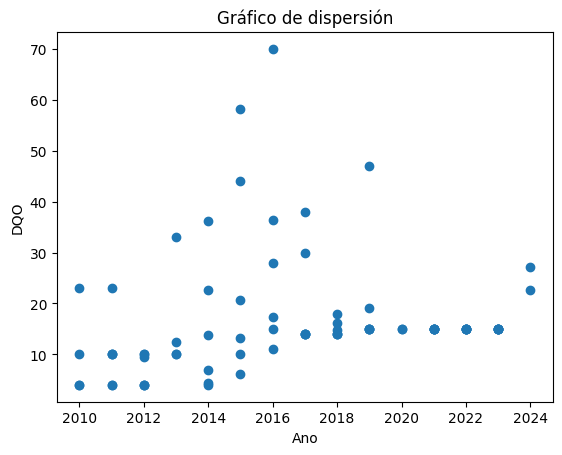

In [ ]:
#Gráfico de dispersión con puntos para las variables X=Ano y y=DQO
plt.scatter(df_defPop['Ano'], df_defPop['DQO'])
plt.xlabel('Ano')
plt.ylabel('DQO')
plt.title('Gráfico de dispersión')
plt.show()

En el gráfico de dispersión no se observa una tendencia lineal clara. A partir del año 2017, se observa que hay menos valores extremos y quizás una dismunución de la carga de DQO, sin embargo, para el 2024, aumenta de nuevo, en este sentido, no se podría analizar una tedenia facilmente. Entre 2012 y 2016 se observan valores muy dispersos, incluyendo picos altos cercanos a 70 mg/L, a partir del 2017, los datos tienden a ser más bajos y concentrados, la mayoría en un rango dentro de 10 y 20 mg/L. Los picos altos sugieren descargas contaminantes puntuales, eventos climáticos o errores de medición, estos hacen parte de los valores atípicos.

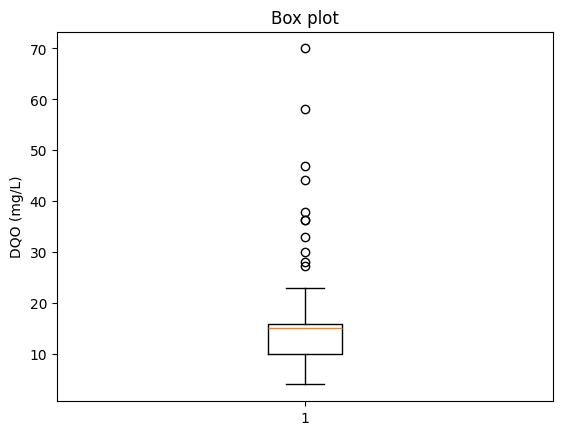

In [ ]:
#Boxplot
plt.boxplot(df_defPop['DQO'])
plt.ylabel('DQO (mg/L)')
plt.title('Box plot')
plt.show()

Respecto al anterior gráfico, se observa que la mayor concentración de datos está dada en un rango aproximado de 15 y 17mg/L. Se observan outliers solo en el límite superior, lo cual quiere decir que la muestra estaría sesgada por valores extremos, que, según la gráfica estaráin por encima de 22 mg/L aproximadamente.

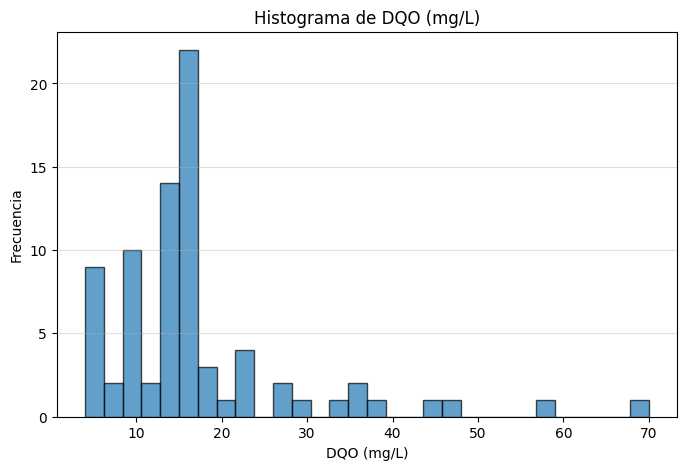

In [ ]:
#Histograma de DQO
plt.figure(figsize=(8,5))
plt.hist(df_defPop["DQO"], bins=30, edgecolor="black", alpha=0.7)

# Personalización
plt.title("Histograma de DQO (mg/L)")
plt.xlabel("DQO (mg/L)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.4)

plt.show()

El histograma representa una asimetría a la derecha, es decir, una asimetría positiva. La mayoría de los valores están dentro de 5 y 20 mg/L. Podría decrise que la moda está alrededor de 15 mg/L, teniendo en cuenta esto, la carga de DQO en la fuente, en general, es moderada.

# **Interpretación de los resultados**

Teniendo en cuenta el gráfico de dispersión, se observa que hay una alta variabilidad en el periodo 2012 - 2106, con picos de DQO cercanos a 70 mg/L, aunque en 2024 vuelve a presentarse un aumento, partir de 2017, los Valores no se observan mayores a 25 mg/L. No hay una tendencia lineal clara sino fluctuante.

Por otro lado, en el gráfico boplot, se puede decobservar que la mediana oscla entre los 12 y 15mg/L, también que existen una gran cantidad de outliers o valores atípicos que incluso llegan a mas de 70mg/L, o cual sugire que hay picos de contaminación que requiren atención a pesar de que la mayor parte de las mediciones se mantienen en un rango moderado.

Finalmente, el histograma muestra que hay una distribución asimétrica hacia la derecha, es decir, un sesgo positivo. La moda se observa cercana a 15 mg/L y la mayoría de valores de concentra en un rango de 5 y 15 mg/L. Hay pocos casos de valores netre 30 y 70mg/L.


# **Conclusiones**

La evaluación de la DQO en el río Cauca durante más de diez años muestra que la mayor parte de los valores se concentran en un rango moderado de 5 a 20 mg/L, con una mediana cercana a 14 mg/L, lo que refleja condiciones relativamente estables en la mayoría de los registros. No obstante, se presentan picos aislados con valores superiores a 60 mg/L, que sugieren alta contaminación y que generan dispersión en los datos y evidencian episodios puntuales críticos. En conjunto, los resultados muestran que, aunque la calidad del agua se mantiene generalmente dentro de niveles moderados, persiste una vulnerabilidad asociada a eventos extremos, los cuales deben ser objeto de mayor atención y seguimiento.